In [3]:
import csv
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from decimal import Decimal

In [4]:
df_match_allyears = pd.read_csv("./match_data_yearly/all_years.csv", index_col=0)
df_match_allyears["Date"] = pd.to_datetime(df_match_allyears["Date"])
df_match_allyears

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances
ID,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199
...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966


In [5]:
df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10011354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10012178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,20.0,6.8,0.0,494.8,17.8,11.8,2.0,6.8,23.4,12.2,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78
20340810,12.2,4.0,0.2,537.2,11.6,14.2,1.0,3.6,21.8,14.2,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62


In [6]:
df_rate = pd.read_csv("./rating/all_years.csv", index_col=0, parse_dates=True)
df_rate

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
2006-03-04,1500,1500,1500,1500,1500,1350,1350,1500,1350,1500,...,1500,1500,1350,1500,1500,1350,1500,1350,1350,1350
2006-03-05,1500,1500,1500,1500,1500,1350,1350,1500,1350,1500,...,1500,1500,1350,1500,1500,1350,1500,1350,1350,1350
2006-03-06,1508,1500,1508,1508,1492,1350,1350,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1350,1350
2006-03-07,1508,1500,1508,1508,1492,1350,1350,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1350,1350
2006-03-08,1508,1500,1508,1508,1492,1350,1351,1508,1350,1500,...,1508,1500,1350,1492,1492,1350,1492,1350,1351,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,1595,1490,1543,1678,1535,1411,1478,1541,1444,1577,...,1420,1331,1424,1473,1410,1408,1362,1313,1406,1372
2020-12-17,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372
2020-12-18,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372
2020-12-19,1595,1486,1543,1682,1526,1419,1487,1541,1455,1582,...,1420,1331,1424,1480,1410,1408,1362,1313,1402,1372


In [7]:
df_allyears = df_match_allyears

In [8]:
for index,row in df_match_allyears.iterrows():
    
    home_rate = df_rate.loc[row["Date"], row["Home"]]
    away_rate = df_rate.loc[row["Date"], row["Away"]]
    
    df_allyears.at[index,"HomeRate"] = home_rate
    df_allyears.at[index,"AwayRate"] = away_rate

In [9]:
df_allyears

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate
ID,,,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500.0,1500.0
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500.0,1500.0
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500.0,1500.0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500.0,1500.0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1595.0,1559.0
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1514.0,1526.0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1455.0,1480.0


In [10]:
df_ranks= pd.read_csv("./ranks/all_years.csv",  index_col=0, parse_dates=True)
df_ranks

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
2006-03-04,1,1,1,1,1,19,19,1,19,1,...,1,1,19,1,1,19,1,19,19,19
2006-03-05,3,1,3,3,3,19,19,3,19,1,...,3,3,19,3,3,19,3,19,19,19
2006-03-06,6,8,2,1,12,19,19,3,19,8,...,3,8,19,14,14,19,17,19,19,19
2006-03-07,6,8,2,1,12,19,19,3,19,8,...,3,8,19,14,14,19,17,19,19,19
2006-03-08,6,8,2,1,12,19,19,3,19,8,...,3,8,19,14,14,19,17,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,5,10,9,1,8,18,7,6,14,2,...,19,19,19,11,19,19,19,19,15,19
2020-12-17,5,10,9,1,8,16,7,6,14,2,...,19,19,19,11,19,19,19,19,15,19
2020-12-18,5,10,9,1,8,16,7,6,14,2,...,19,19,19,11,19,19,19,19,15,19
2020-12-19,5,10,9,1,8,16,7,6,14,2,...,19,19,19,11,19,19,19,19,15,19


In [11]:
for index,row in df_match_allyears.iterrows():
    home_rank = df_ranks.loc[row["Date"], row["Home"]]
    away_rank = df_ranks.loc[row["Date"], row["Away"]]
    
    df_allyears.at[index,"HomeRank"] = home_rank
    df_allyears.at[index,"AwayRank"] = away_rank

In [12]:
df_allyears

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRank,AwayRank
ID,,,,,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500.0,1500.0,1.0,1.0
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500.0,1500.0,3.0,3.0
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500.0,1500.0,3.0,3.0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500.0,1500.0,3.0,3.0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500.0,1500.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1595.0,1559.0,5.0,4.0
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1514.0,1526.0,3.0,8.0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1455.0,1480.0,14.0,11.0


In [13]:
df_points = pd.read_csv("./points/all_years.csv" ,index_col=0, parse_dates=True)
df_points

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-03-05,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2006-03-06,3,1,3,3,0,0,0,3,0,1,...,3,1,0,0,0,0,0,0,0,0
2006-03-07,3,1,3,3,0,0,0,3,0,1,...,3,1,0,0,0,0,0,0,0,0
2006-03-08,3,1,3,3,0,0,0,3,0,1,...,3,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,58,46,47,77,48,24,49,54,32,62,...,0,0,0,39,0,0,0,0,30,0
2020-12-17,58,46,47,80,48,27,52,54,35,65,...,0,0,0,42,0,0,0,0,30,0
2020-12-18,58,46,47,80,48,27,52,54,35,65,...,0,0,0,42,0,0,0,0,30,0


In [14]:
for index,row in df_match_allyears.iterrows():
    home_points = df_points.loc[row["Date"], row["Home"]]
    away_points = df_points.loc[row["Date"], row["Away"]]
    
    df_allyears.at[index,"HomePoints"] = home_points
    df_allyears.at[index,"AwayPoints"] = away_points

In [15]:
df_allyears

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRank,AwayRank,HomePoints,AwayPoints
ID,,,,,,,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500.0,1500.0,1.0,1.0,0.0,0.0
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500.0,1500.0,3.0,3.0,0.0,0.0
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500.0,1500.0,3.0,3.0,0.0,0.0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500.0,1500.0,3.0,3.0,0.0,0.0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500.0,1500.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1595.0,1559.0,5.0,4.0,58.0,59.0
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1514.0,1526.0,3.0,8.0,60.0,48.0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1455.0,1480.0,14.0,11.0,35.0,42.0


In [16]:
df_gd = pd.read_csv("./goal_differences/all_years.csv",index_col=0, parse_dates=True)
df_gd

,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,kawasaki-frontale,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,gamba-osaka,...,omiya-ardija,avispa-fukuoka,matsumoto-yamaga,oita-trinita,jef-united,tokyo-verdy,kyoto-sanga,tokushima-vortis,yokohama-fc,montedio-yamagata
date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006-03-06,1,0,3,6,-1,0,0,2,0,0,...,2,0,0,-2,-2,0,-3,0,0,0
2006-03-07,1,0,3,6,-1,0,0,2,0,0,...,2,0,0,-2,-2,0,-3,0,0,0
2006-03-08,1,0,3,6,-1,0,0,2,0,0,...,2,0,0,-2,-2,0,-3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-16,11,-9,12,54,11,-26,14,4,-7,4,...,0,0,0,-10,0,0,0,0,-22,0
2020-12-17,11,-11,12,56,10,-25,15,4,-6,6,...,0,0,0,-9,0,0,0,0,-24,0
2020-12-18,11,-11,12,56,10,-25,15,4,-6,6,...,0,0,0,-9,0,0,0,0,-24,0


In [17]:
for index,row in df_match_allyears.iterrows():
    home_gd = df_gd.loc[row["Date"], row["Home"]]
    away_gd = df_gd.loc[row["Date"], row["Away"]]
    
    df_allyears.at[index,"HomeGD"] = home_gd
    df_allyears.at[index,"AwayGD"] = away_gd

In [18]:
df_allyears

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeRate,AwayRate,HomeRank,AwayRank,HomePoints,AwayPoints,HomeGD,AwayGD
ID,,,,,,,,,,,,,,,,,,,,
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,20916,1500.0,1500.0,1.0,1.0,0.0,0.0,0.0,0.0
6012807,2006,1,2006-03-05,ventforet-kofu,shimizu-s-pulse,28,7,0,2,2,小瀬,14277,1500.0,1500.0,3.0,3.0,0.0,0.0,0.0,0.0
6012231,2006,1,2006-03-05,fc-tokyo,oita-trinita,22,31,2,0,1,味スタ,22531,1500.0,1500.0,3.0,3.0,0.0,0.0,0.0,0.0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,28564,1500.0,1500.0,3.0,3.0,0.0,0.0,0.0,0.0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,17199,1500.0,1500.0,3.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1595.0,1559.0,5.0,4.0,58.0,59.0,11.0,9.0
20340810,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1514.0,1526.0,3.0,8.0,60.0,48.0,16.0,10.0
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1455.0,1480.0,14.0,11.0,35.0,42.0,-6.0,-9.0


In [19]:
df_allyears = pd.concat([df_allyears,df_recent_stats],axis=1)
df_allyears

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,2,...,19.0,2.4,2.2,0.0,0.2,64.0,24.4,115.2,16.08,54.30
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20343405,2020,34,2020-12-19,yokohama-fc,yokohama-fa-marinos,34,5,3,1,1,...,23.2,2.0,2.4,2.0,0.2,61.2,19.6,124.4,11.58,54.54


In [20]:
df_allyears.insert(9,"GFDiff",df_allyears["HomeGF"]-df_allyears["AwayGF"])

In [21]:
df_allyears

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,GFDiff,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,-1,...,19.0,2.4,2.2,0.0,0.2,64.0,24.4,115.2,16.08,54.30
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20343405,2020,34,2020-12-19,yokohama-fc,yokohama-fa-marinos,34,5,3,1,2,...,23.2,2.0,2.4,2.0,0.2,61.2,19.6,124.4,11.58,54.54


In [22]:
df = df_allyears[df_allyears["Year"] >= 2012]
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,GFDiff,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
12010807,2012,1,2012-03-10,nagoya-grampus-eight,shimizu-s-pulse,8,7,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12010918,2012,1,2012-03-10,gamba-osaka,vissel-kobe,9,18,2,3,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011003,2012,1,2012-03-10,sanfrecce-hiroshima,urawa-red-diamonds,10,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011105,2012,1,2012-03-11,kashiwa-reysol,yokohama-fa-marinos,11,5,3,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011413,2012,1,2012-03-10,consadole-sapporo,jubilo-iwata,14,13,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,-1,...,19.0,2.4,2.2,0.0,0.2,64.0,24.4,115.2,16.08,54.30
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20343405,2020,34,2020-12-19,yokohama-fc,yokohama-fa-marinos,34,5,3,1,2,...,23.2,2.0,2.4,2.0,0.2,61.2,19.6,124.4,11.58,54.54


### statsの欠損値を前の年の降格チームの平均値で埋める

In [23]:
df_clubs = pd.read_csv("./clubs.csv", index_col=0)
df_clubs

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2006,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,cerezo-osaka,kawasaki-frontale,fc-tokyo,avispa-fukuoka,kyoto-sanga,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata
2007,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,sanfrecce-hiroshima,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,ventforet-kofu,oita-trinita,albirex-niigata,vissel-kobe,kashiwa-reysol,yokohama-fc
2008,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,oita-trinita,albirex-niigata,vissel-kobe,kashiwa-reysol,consadole-sapporo,tokyo-verdy,kyoto-sanga
2009,kashima-antlers,jef-united,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,oita-trinita,albirex-niigata,vissel-kobe,kashiwa-reysol,kyoto-sanga,sanfrecce-hiroshima,montedio-yamagata
2010,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,jubilo-iwata,kawasaki-frontale,fc-tokyo,omiya-ardija,albirex-niigata,vissel-kobe,kyoto-sanga,sanfrecce-hiroshima,montedio-yamagata,vegalta-sendai,cerezo-osaka,shonan-bellmare
2011,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,jubilo-iwata,kawasaki-frontale,omiya-ardija,albirex-niigata,vissel-kobe,sanfrecce-hiroshima,montedio-yamagata,vegalta-sendai,cerezo-osaka,kashiwa-reysol,ventforet-kofu,avispa-fukuoka
2012,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,gamba-osaka,jubilo-iwata,kawasaki-frontale,omiya-ardija,albirex-niigata,vissel-kobe,sanfrecce-hiroshima,vegalta-sendai,cerezo-osaka,kashiwa-reysol,fc-tokyo,sagan-tosu,consadole-sapporo
2013,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,jubilo-iwata,kawasaki-frontale,omiya-ardija,albirex-niigata,sanfrecce-hiroshima,vegalta-sendai,cerezo-osaka,kashiwa-reysol,fc-tokyo,sagan-tosu,ventforet-kofu,shonan-bellmare,oita-trinita
2014,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,kawasaki-frontale,omiya-ardija,albirex-niigata,sanfrecce-hiroshima,vegalta-sendai,cerezo-osaka,kashiwa-reysol,fc-tokyo,sagan-tosu,ventforet-kofu,gamba-osaka,vissel-kobe,tokushima-vortis
2015,kashima-antlers,urawa-red-diamonds,yokohama-fa-marinos,shimizu-s-pulse,nagoya-grampus-eight,kawasaki-frontale,albirex-niigata,sanfrecce-hiroshima,vegalta-sendai,kashiwa-reysol,fc-tokyo,sagan-tosu,ventforet-kofu,gamba-osaka,vissel-kobe,shonan-bellmare,matsumoto-yamaga,montedio-yamagata


In [24]:
for year in range(2012,2021):
    relegation_clubs = list(set(df_clubs.loc[year-1])-set(df_clubs.loc[year]))
    
    df_relegation_stats = pd.DataFrame(columns=df_recent_stats.columns)

    for relegation_club in  relegation_clubs:
        relegation_stats     = (
            df[
                (df["Year"] == year-1) &
                ((df["Home"] == relegation_club)|(df["Away"] == relegation_club))
            ][df_recent_stats.columns].mean())

        df_relegation_stats.loc[relegation_club] = relegation_stats
        
        relegation_stats_mean = df_relegation_stats.mean()
    
    df[df["Year"] == year] = df[df["Year"] == year].fillna(relegation_stats_mean)


<ipython-input-24-ec801f445244>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Year"] == year] = df[df["Year"] == year].fillna(relegation_stats_mean)
/home/yokoyama/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
<ipython-input-24-ec801f445244>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [25]:
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,GFDiff,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
12010807,2012,1,2012-03-10,nagoya-grampus-eight,shimizu-s-pulse,8,7,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12010918,2012,1,2012-03-10,gamba-osaka,vissel-kobe,9,18,2,3,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011003,2012,1,2012-03-10,sanfrecce-hiroshima,urawa-red-diamonds,10,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011105,2012,1,2012-03-11,kashiwa-reysol,yokohama-fa-marinos,11,5,3,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011413,2012,1,2012-03-10,consadole-sapporo,jubilo-iwata,14,13,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,-1,...,19.0,2.4,2.2,0.0,0.2,64.0,24.4,115.2,16.08,54.30
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20343405,2020,34,2020-12-19,yokohama-fc,yokohama-fa-marinos,34,5,3,1,2,...,23.2,2.0,2.4,2.0,0.2,61.2,19.6,124.4,11.58,54.54


### StatsのHomeとAwayの差分を特徴量に追加

In [26]:
df.columns

Index(['Year', 'Sec', 'Date', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF',
       'AwayGF', 'GFDiff', 'W/L', 'Stadium', 'Attendances', 'HomeRate',
       'AwayRate', 'HomeRank', 'AwayRank', 'HomePoints', 'AwayPoints',
       'HomeGD', 'AwayGD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAtta

In [27]:
stats_features = [
    'Rate','Rank','Points','GD','Shots', 'ShotsOnTarget', 'ShotsFromPK', 'Passes','Crosses', 'DirectFK', 'IndirectFK',
    'CK','Throwin', 'Dribbling','Tackles', 'Clearances','Intercepts', 'Offsides', 'YellowCards', 'RedCards',
    '30mLineEntries', 'PenaltyAreaEntries', 'Attacks','ChanceBuildingRate', 'Possession'
]

In [28]:
for fet in stats_features:
    df.insert(len(df.columns), f"{fet}Diff", df[f"Home{fet}"] - df[f"Away{fet}"])

In [29]:
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,GFDiff,...,ClearancesDiff,InterceptsDiff,OffsidesDiff,YellowCardsDiff,RedCardsDiff,30mLineEntriesDiff,PenaltyAreaEntriesDiff,AttacksDiff,ChanceBuildingRateDiff,PossessionDiff
12010807,2012,1,2012-03-10,nagoya-grampus-eight,shimizu-s-pulse,8,7,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12010918,2012,1,2012-03-10,gamba-osaka,vissel-kobe,9,18,2,3,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011003,2012,1,2012-03-10,sanfrecce-hiroshima,urawa-red-diamonds,10,3,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011105,2012,1,2012-03-11,kashiwa-reysol,yokohama-fa-marinos,11,5,3,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12011413,2012,1,2012-03-10,consadole-sapporo,jubilo-iwata,14,13,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,-1,...,9.0,0.4,-0.2,1.0,-0.2,-24.2,-12.2,8.6,-6.96,-7.24
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,...,7.4,-1.8,-0.8,0.0,0.0,-26.6,-1.4,8.6,-4.42,-16.82
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,...,4.0,-0.4,1.2,-1.0,0.0,14.8,5.4,1.6,2.80,-2.00
20343405,2020,34,2020-12-19,yokohama-fc,yokohama-fa-marinos,34,5,3,1,2,...,-5.2,-0.6,0.0,-1.6,-0.2,-10.0,-8.2,-17.6,0.92,1.76


In [30]:
df.columns

Index(['Year', 'Sec', 'Date', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF',
       'AwayGF', 'GFDiff', 'W/L', 'Stadium', 'Attendances', 'HomeRate',
       'AwayRate', 'HomeRank', 'AwayRank', 'HomePoints', 'AwayPoints',
       'HomeGD', 'AwayGD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAtta

### 線形回帰

In [31]:
X_features = [ 
    'Sec', 'HomeRate', 'AwayRate','HomeRank', 'AwayRank', 'HomePoints', 'AwayPoints', 
    'HomeGD', 'AwayGD','HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK', 'HomePasses',
    'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK','HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
    'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards','Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
    'HomeChanceBuildingRate', 'HomePossession', 'AwayShots','AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
    'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin','AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
    'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries','AwayPenaltyAreaEntries', 
    'AwayAttacks', 'AwayChanceBuildingRate','AwayPossession',
    'RateDiff',  'RankDiff', 'PointsDiff', 'GDDiff','ShotsDiff', 'ShotsOnTargetDiff',
    'ShotsFromPKDiff', 'PassesDiff', 'CrossesDiff', 'DirectFKDiff','IndirectFKDiff', 
    'CKDiff', 'ThrowinDiff', 'DribblingDiff','TacklesDiff', 'ClearancesDiff', 'InterceptsDiff', 'OffsidesDiff','YellowCardsDiff', 
    'RedCardsDiff', '30mLineEntriesDiff','PenaltyAreaEntriesDiff', 'AttacksDiff', 'ChanceBuildingRateDiff','PossessionDiff'
]

wl_preds_allyear = []
wl_tests_allyear = []
preds_allyear = []
tests_allyear = []

correct_preds_allyear = []
accuracies = []

for year in range(2015, 2021):
    print(f"=={year}=================================")
    
    X_train = df[(df["Year"] == (year-3)) | (df["Year"] == (year-2)) | (df["Year"] == (year-1))].dropna(how="any")[X_features].values
    y_train = df[(df["Year"] == (year-3)) | (df["Year"] == (year-2)) | (df["Year"] == (year-1))].dropna(how="any")["GFDiff"].values
    
    X_test = df[df["Year"] == year][X_features].values
    y_test = df[df["Year"] == year]["GFDiff"].values
    
    clf = LinearRegression(fit_intercept=False)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    preds_allyear.extend(y_pred)
    tests_allyear.extend(y_test)
    
    preds = y_pred.tolist()
    wl_preds = []
    wl_tests = []
    correct_preds = []
    
    for pred in y_pred:
        if pred > 0:
            wl_preds.append(1)
        elif pred < 0:
            wl_preds.append(2)
        else:
            wl_preds.append(0)
    wl_preds_allyear.extend(wl_preds)
    
    for test in y_test:
        if test > 0:
            wl_tests.append(1)
        elif test < 0:
            wl_tests.append(2)
        else:
            wl_tests.append(0)
    wl_tests_allyear.extend(wl_tests)
        
    for wl_p,wl_t in zip(wl_preds, wl_tests):
        if wl_p == wl_t:
            correct_preds.append(wl_p)
    correct_preds_allyear.extend(correct_preds)
    
    accuracy = len(correct_preds) / len(preds)
    accuracies.append(accuracy)
    
    print(f"R2 : {clf.score(X_test,y_test)}")
    print(f"Accuracy : {accuracy}")
    print(" ")

print(f"的中率(Accuracy) : {np.mean(accuracies)}" )
    

==2015=================================
R2 : 0.025129540487061952
Accuracy : 0.42810457516339867
 
==2016=================================
R2 : 0.14916153160295864
Accuracy : 0.49019607843137253
 
==2017=================================
R2 : 0.02696966462783934
Accuracy : 0.46405228758169936
 
==2018=================================
R2 : -0.03745404329856239
Accuracy : 0.4411764705882353
 
==2019=================================
R2 : 0.01693816470530829
Accuracy : 0.4673202614379085
 
==2020=================================
R2 : 0.10296909869470161
Accuracy : 0.48366013071895425
 
的中率(Accuracy) : 0.46241830065359474


In [32]:
import collections
collections.Counter(wl_preds_allyear)

Counter({1: 1058, 2: 778})

In [33]:
collections.Counter(wl_tests_allyear)

Counter({2: 674, 0: 427, 1: 735})

In [34]:
collections.Counter(correct_preds_allyear)

Counter({1: 495, 2: 354})

In [35]:
len(correct_preds_allyear)

849

In [36]:
495/735,354/674,0/427,849/1836

(0.673469387755102, 0.5252225519287834, 0.0, 0.4624183006535948)

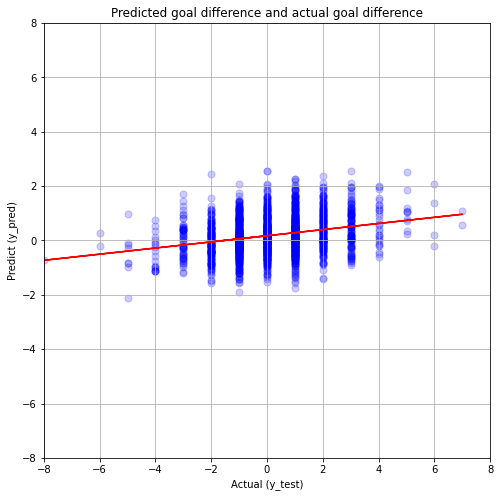

In [37]:
x = np.array(tests_allyear)
y = np.array(preds_allyear)
a, b = np.polyfit(x, y, 1)
y2 = a * x + b

plt.figure(figsize=(8,8))
plt.plot(x,y2, c='red', alpha=1)

plt.scatter(x,y,c='blue', alpha=0.2, s=50)
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.title("Predicted goal difference and actual goal difference")
plt.xlabel("Actual (y_test)")
plt.ylabel("Predict (y_pred)")
plt.grid(True)

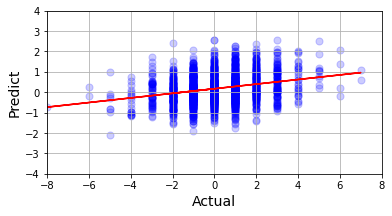

In [62]:
# 予稿用
x = np.array(tests_allyear)
y = np.array(preds_allyear)
a, b = np.polyfit(x, y, 1)
y2 = a * x + b

plt.figure(figsize=(6,3))
plt.plot(x,y2, c='red', alpha=1)

plt.scatter(x,y,c='blue', alpha=0.2, s=50)
plt.xlim(-8,8)
plt.ylim(-4,4)
plt.xlabel("Actual",fontsize=14)
plt.ylabel("Predict",fontsize=14)
plt.grid(True)

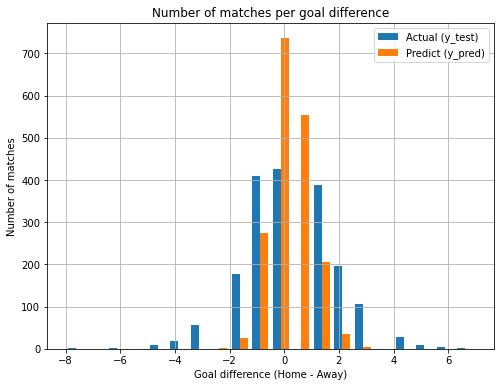

In [45]:
plt.figure(figsize=(8,6))
labels = ['Actual (y_test)', 'Predict (y_pred)']
plt.hist([tests_allyear, preds_allyear],bins=20, stacked=False, label=labels)
plt.grid(True)
plt.title("Number of matches per goal difference")
plt.xlabel("Goal difference (Home - Away)")
plt.ylabel("Number of matches")
plt.legend()